In [57]:
import pandas as pd
import numpy as np

In [58]:
gldv_df = pd.read_csv('gldv.csv', header=None)
gllc_df = pd.read_csv('gllc.csv', header=None)
glws_df = pd.read_csv('glws.csv', header=None)

In [59]:
gldv_df.shape

(383, 161)

In [60]:
gllc_df.shape

(492, 161)

In [61]:
glws_df.shape

(660, 161)

In [62]:
playoff_gl = pd.concat([gldv_df, gllc_df, glws_df])
playoff_gl.shape

(1535, 161)

In [63]:
playoff_gl.head()

,0,1,2,3,4,5,6,7,8,9,...,151,152,153,154,155,156,157,158,159,160
0,19811006,0,Tue,LAN,NL,1,HOU,NL,1,1,...,Kiko Garcia,6,ashba001,Alan Ashby,2,ryann001,Nolan Ryan,1,NaN,Y
1,19811006,0,Tue,OAK,AL,1,KCA,AL,1,4,...,Clint Hurdle,9,wathj001,John Wathan,2,washu001,U L Washington,6,NaN,Y
2,19811007,0,Wed,PHI,NL,1,MON,NL,1,1,...,Jerry Manuel,4,speic001,Chris Speier,6,roges001,Steve Rogers,1,NaN,Y
3,19811007,0,Wed,LAN,NL,2,HOU,NL,2,0,...,Dickie Thon,6,pujol001,Luis Pujols,2,niekj001,Joe Niekro,1,NaN,Y
4,19811007,0,Wed,NYA,AL,1,MIL,AL,1,5,...,Sal Bando,5,moorc001,Charlie Moore,10,gantj001,Jim Gantner,4,NaN,Y


In [64]:
playoff_gl = playoff_gl[[0,3,6,9,10,101,102,103,104]]

Trim the dataframe down to only needed columns in years 2010 and later: Date, Visiting Team, Home Team, Score, Pitchers

In [65]:
playoff_gl['year'] = playoff_gl[0] // 10000
playoff_gl.head()

,0,3,6,9,10,101,102,103,104,year
0,19811006,LAN,HOU,1,3,valef001,Fernando Valenzuela,ryann001,Nolan Ryan,1981
1,19811006,OAK,KCA,4,0,norrm101,Mike Norris,leond001,Dennis Leonard,1981
2,19811007,PHI,MON,1,3,carls001,Steve Carlton,roges001,Steve Rogers,1981
3,19811007,LAN,HOU,0,1,reusj001,Jerry Reuss,niekj001,Joe Niekro,1981
4,19811007,NYA,MIL,5,3,guidr001,Ron Guidry,haasm001,Moose Haas,1981


In [66]:
playoff_gl = playoff_gl.rename(columns = {0:'date', 3:'visiting_team', 6:'home_team', 9:'visiting_team_score', 10:'home_team_score', 101:'visiting_sp_id', 102:'visiting_sp', 103:'home_sp_id', 104:'home_sp'})
playoff_gl.head()

,date,visiting_team,home_team,visiting_team_score,home_team_score,visiting_sp_id,visiting_sp,home_sp_id,home_sp,year
0,19811006,LAN,HOU,1,3,valef001,Fernando Valenzuela,ryann001,Nolan Ryan,1981
1,19811006,OAK,KCA,4,0,norrm101,Mike Norris,leond001,Dennis Leonard,1981
2,19811007,PHI,MON,1,3,carls001,Steve Carlton,roges001,Steve Rogers,1981
3,19811007,LAN,HOU,0,1,reusj001,Jerry Reuss,niekj001,Joe Niekro,1981
4,19811007,NYA,MIL,5,3,guidr001,Ron Guidry,haasm001,Moose Haas,1981


In [67]:
playoff_gl_2010_df = playoff_gl.query('year >= 2010')
playoff_gl_2010_df

,date,visiting_team,home_team,visiting_team_score,home_team_score,visiting_sp_id,visiting_sp,home_sp_id,home_sp,year
246,20101006,NYA,MIN,6,4,sabac001,CC Sabathia,lirif001,Francisco Liriano,2010
247,20101006,TEX,TBA,5,1,lee-c003,Cliff Lee,pricd001,David Price,2010
248,20101006,CIN,PHI,0,4,volqe001,Edinson Volquez,hallr001,Roy Halladay,2010
249,20101007,NYA,MIN,5,2,petta001,Andy Pettitte,pavac001,Carl Pavano,2010
250,20101007,TEX,TBA,6,0,wilsc004,C.J. Wilson,shiej002,James Shields,2010
251,20101007,ATL,SFN,0,1,lowed001,Derek Lowe,linct001,Tim Lincecum,2010
252,20101008,CIN,PHI,4,7,arrob001,Bronson Arroyo,oswar001,Roy Oswalt,2010
253,20101008,ATL,SFN,5,4,hanst001,Tommy Hanson,cainm001,Matt Cain,2010
254,20101009,MIN,NYA,1,6,duenb001,Brian Duensing,hughp001,Phil Hughes,2010
255,20101009,TBA,TEX,6,3,garzm001,Matt Garza,lewic001,Colby Lewis,2010


In [68]:
playoff_gl_2010_df['winning_team'] = np.where(playoff_gl_2010_df['visiting_team_score'] > playoff_gl_2010_df['home_team_score'], playoff_gl_2010_df['visiting_team'], playoff_gl_2010_df['home_team'])
playoff_gl_2010_df['losing_team'] = np.where(playoff_gl_2010_df['visiting_team_score'] > playoff_gl_2010_df['home_team_score'], playoff_gl_2010_df['home_team'], playoff_gl_2010_df['visiting_team'])

playoff_gl_2010_df.head()

C:\Users\mking\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\mking\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,date,visiting_team,home_team,visiting_team_score,home_team_score,visiting_sp_id,visiting_sp,home_sp_id,home_sp,year,winning_team,losing_team
246,20101006,NYA,MIN,6,4,sabac001,CC Sabathia,lirif001,Francisco Liriano,2010,NYA,MIN
247,20101006,TEX,TBA,5,1,lee-c003,Cliff Lee,pricd001,David Price,2010,TEX,TBA
248,20101006,CIN,PHI,0,4,volqe001,Edinson Volquez,hallr001,Roy Halladay,2010,PHI,CIN
249,20101007,NYA,MIN,5,2,petta001,Andy Pettitte,pavac001,Carl Pavano,2010,NYA,MIN
250,20101007,TEX,TBA,6,0,wilsc004,C.J. Wilson,shiej002,James Shields,2010,TEX,TBA


In [69]:
playoff_gl_2010_df['winning_team_year'] = playoff_gl_2010_df['year'].map(str) + " " + playoff_gl_2010_df['winning_team']
playoff_gl_2010_df['losing_team_year'] = playoff_gl_2010_df['year'].map(str) + " " + playoff_gl_2010_df['losing_team']
playoff_gl_2010_df['visiting_sp_year'] = playoff_gl_2010_df['year'].map(str) + " " + playoff_gl_2010_df['visiting_sp'] + " " + playoff_gl_2010_df['visiting_team']
playoff_gl_2010_df['home_sp_year'] = playoff_gl_2010_df['year'].map(str) + " " + playoff_gl_2010_df['home_sp'] + " " + playoff_gl_2010_df['home_team']

playoff_gl_2010_df.head()

C:\Users\mking\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\mking\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\mking\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

,date,visiting_team,home_team,visiting_team_score,home_team_score,visiting_sp_id,visiting_sp,home_sp_id,home_sp,year,winning_team,losing_team,winning_team_year,losing_team_year,visiting_sp_year,home_sp_year
246,20101006,NYA,MIN,6,4,sabac001,CC Sabathia,lirif001,Francisco Liriano,2010,NYA,MIN,2010 NYA,2010 MIN,2010 CC Sabathia NYA,2010 Francisco Liriano MIN
247,20101006,TEX,TBA,5,1,lee-c003,Cliff Lee,pricd001,David Price,2010,TEX,TBA,2010 TEX,2010 TBA,2010 Cliff Lee TEX,2010 David Price TBA
248,20101006,CIN,PHI,0,4,volqe001,Edinson Volquez,hallr001,Roy Halladay,2010,PHI,CIN,2010 PHI,2010 CIN,2010 Edinson Volquez CIN,2010 Roy Halladay PHI
249,20101007,NYA,MIN,5,2,petta001,Andy Pettitte,pavac001,Carl Pavano,2010,NYA,MIN,2010 NYA,2010 MIN,2010 Andy Pettitte NYA,2010 Carl Pavano MIN
250,20101007,TEX,TBA,6,0,wilsc004,C.J. Wilson,shiej002,James Shields,2010,TEX,TBA,2010 TEX,2010 TBA,2010 C.J. Wilson TEX,2010 James Shields TBA


In [70]:
wins_df = pd.DataFrame(playoff_gl_2010_df['winning_team_year'].value_counts().reset_index())
wins_df

,index,winning_team_year
0,2013 BOS,11
1,2010 SFN,11
2,2012 SFN,11
3,2017 HOU,11
4,2014 SFN,11
5,2015 KCA,11
6,2016 CHN,11
7,2011 SLN,11
8,2014 KCA,10
9,2011 TEX,10


In [71]:
losses_df = pd.DataFrame(playoff_gl_2010_df['losing_team_year'].value_counts().reset_index())
losses_df

,index,losing_team_year
0,2010 TEX,8
1,2013 SLN,8
2,2011 SLN,7
3,2011 TEX,7
4,2017 HOU,7
5,2017 CHN,6
6,2016 CHN,6
7,2015 NYN,6
8,2016 LAN,6
9,2017 NYA,6


In [72]:
playoff_records_df = pd.merge(wins_df,losses_df, on='index', how='outer')
playoff_records_df.fillna(0, inplace=True)
playoff_records_df['winning_team_year'] = playoff_records_df['winning_team_year'].astype(int)
playoff_records_df = playoff_records_df.rename(columns={'index':'team', 'winning_team_year':'wins', 'losing_team_year':'losses'})
playoff_records_df

,team,wins,losses
0,2013 BOS,11,5
1,2010 SFN,11,4
2,2012 SFN,11,5
3,2017 HOU,11,7
4,2014 SFN,11,5
5,2015 KCA,11,5
6,2016 CHN,11,6
7,2011 SLN,11,7
8,2014 KCA,10,4
9,2011 TEX,10,7


In [73]:
playoff_records_df['playoff_winning_perc'] = playoff_records_df['wins'] / (playoff_records_df['wins'] + playoff_records_df['losses'])

In [74]:
playoff_records_df

,team,wins,losses,playoff_winning_perc
0,2013 BOS,11,5,0.687500
1,2010 SFN,11,4,0.733333
2,2012 SFN,11,5,0.687500
3,2017 HOU,11,7,0.611111
4,2014 SFN,11,5,0.687500
5,2015 KCA,11,5,0.687500
6,2016 CHN,11,6,0.647059
7,2011 SLN,11,7,0.611111
8,2014 KCA,10,4,0.714286
9,2011 TEX,10,7,0.588235


In [75]:
playoff_teams_list = playoff_records_df['team'].values.ravel('K')
playoff_teams_list

array(['2013 BOS', '2010 SFN', '2012 SFN', '2017 HOU', '2014 SFN',
       '2015 KCA', '2016 CHN', '2011 SLN', '2014 KCA', '2011 TEX',
       '2017 LAN', '2016 CLE', '2013 SLN', '2015 NYN', '2010 TEX',
       '2012 DET', '2012 SLN', '2017 NYA', '2011 DET', '2015 TOR',
       '2010 PHI', '2011 MIL', '2013 DET', '2013 LAN', '2010 NYA',
       '2016 LAN', '2014 SLN', '2016 TOR', '2017 CHN', '2014 BAL',
       '2015 CHN', '2012 NYA', '2012 OAK', '2017 CLE', '2015 LAN',
       '2012 WAS', '2017 WAS', '2011 PHI', '2012 BAL', '2011 ARI',
       '2013 OAK', '2011 NYA', '2015 TEX', '2016 WAS', '2010 TBA',
       '2012 CIN', '2015 HOU', '2013 PIT', '2013 TBA', '2013 ATL',
       '2010 ATL', '2015 SLN', '2017 BOS', '2016 SFN', '2014 LAN',
       '2014 WAS', '2011 TBA', '2014 DET', '2017 ARI', '2010 MIN',
       '2010 CIN', '2014 ANA', '2016 BOS', '2016 TEX'], dtype=object)

In [76]:
playoff_pitcher_list = pd.unique(playoff_gl_2010_df[['home_sp_year','visiting_sp_year']].values.ravel('K'))

In [77]:
playoff_pitcher_list

array(['2010 Francisco Liriano MIN', '2010 David Price TBA',
       '2010 Roy Halladay PHI', '2010 Carl Pavano MIN',
       '2010 James Shields TBA', '2010 Tim Lincecum SFN',
       '2010 Roy Oswalt PHI', '2010 Matt Cain SFN',
       '2010 Phil Hughes NYA', '2010 Colby Lewis TEX',
       '2010 Tommy Hunter TEX', '2010 Johnny Cueto CIN',
       '2010 Tim Hudson ATL', '2010 Derek Lowe ATL',
       '2011 C.J. Wilson TEX', '2011 CC Sabathia NYA',
       '2011 Yovani Gallardo MIL', '2011 Roy Halladay PHI',
       '2011 Derek Holland TEX', '2011 Zack Greinke MIL',
       '2011 Cliff Lee PHI', '2011 Freddy Garcia NYA',
       '2011 David Price TBA', '2011 Justin Verlander DET',
       '2011 Josh Collmenter ARI', '2011 Jaime Garcia SLN',
       '2011 Jeremy Hellickson TBA', '2011 Rick Porcello DET',
       '2011 Joe Saunders ARI', '2011 Edwin Jackson SLN',
       '2011 Ivan Nova NYA', '2012 Justin Verlander DET',
       '2012 Matt Cain SFN', '2012 Doug Fister DET',
       '2012 Jason Hammel BA

In [78]:
years = list(range(2010,2018))
reg_season_gl_df = pd.DataFrame()


for year in years:
    year_gl_df = pd.read_csv('GL{}.csv'.format(year), header=None)
    reg_season_gl_df = reg_season_gl_df.append(year_gl_df)

reg_season_gl_df.head()

,0,1,2,3,4,5,6,7,8,9,...,151,152,153,154,155,156,157,158,159,160
0,20100404,0,Sun,NYA,AL,1,BOS,AL,1,7,...,J.D. Drew,9,camem001,Mike Cameron,8,scutm001,Marco Scutaro,6,NaN,Y
1,20100405,0,Mon,MIN,AL,1,ANA,AL,1,3,...,Howie Kendrick,4,woodb003,Brandon Wood,5,mathj001,Jeff Mathis,2,NaN,Y
2,20100405,0,Mon,CLE,AL,1,CHA,AL,1,0,...,A.J. Pierzynski,2,teahm001,Mark Teahen,5,ramia003,Alexei Ramirez,6,NaN,Y
3,20100405,0,Mon,DET,AL,1,KCA,AL,1,8,...,Yuniesky Betancourt,6,kendj001,Jason Kendall,2,getzc001,Chris Getz,4,NaN,Y
4,20100405,0,Mon,SEA,AL,1,OAK,AL,1,5,...,Mark Ellis,4,buckt001,Travis Buck,7,pennc001,Cliff Pennington,6,NaN,Y


In [79]:
reg_season_gl_df.tail()

,0,1,2,3,4,5,6,7,8,9,...,151,152,153,154,155,156,157,158,159,160
2425,20171001,0,Sun,ARI,NL,162,KCA,AL,162,14,...,Alex Gordon,7,buted001,Drew Butera,2,cainl001,Lorenzo Cain,8,NaN,Y
2426,20171001,0,Sun,DET,AL,162,MIN,AL,162,1,...,Byron Buxton,8,castj006,Jason Castro,2,grosr001,Robbie Grossman,9,NaN,Y
2427,20171001,0,Sun,TOR,AL,162,NYA,AL,162,2,...,Austin Romine,2,frazc001,Clint Frazier,7,austt001,Tyler Austin,9,NaN,Y
2428,20171001,0,Sun,BAL,AL,162,TBA,AL,162,0,...,Curt Casali,2,smitm007,Mallex Smith,8,robed004,Daniel Robertson,6,NaN,Y
2429,20171001,0,Sun,OAK,AL,162,TEX,AL,162,5,...,Rougned Odor,4,nichb001,Brett Nicholas,2,robid003,Drew Robinson,5,NaN,Y


In [80]:
reg_season_gl_df = reg_season_gl_df[[0,3,6,9,10,101,102,103,104]]

In [81]:
reg_season_gl_df = reg_season_gl_df.rename(columns = {0:'date', 3:'visiting_team', 6:'home_team', 9:'visiting_team_score', 10:'home_team_score', 101:'visiting_sp_id', 102:'visiting_sp', 103:'home_sp_id', 104:'home_sp'})

In [82]:
reg_season_gl_df['year'] = reg_season_gl_df['date'] // 10000
reg_season_gl_df.head()

,date,visiting_team,home_team,visiting_team_score,home_team_score,visiting_sp_id,visiting_sp,home_sp_id,home_sp,year
0,20100404,NYA,BOS,7,9,sabac001,CC Sabathia,beckj002,Josh Beckett,2010
1,20100405,MIN,ANA,3,6,bakes002,Scott Baker,weavj003,Jered Weaver,2010
2,20100405,CLE,CHA,0,6,westj001,Jake Westbrook,buehm001,Mark Buehrle,2010
3,20100405,DET,KCA,8,4,verlj001,Justin Verlander,greiz001,Zack Greinke,2010
4,20100405,SEA,OAK,5,3,hernf002,Felix Hernandez,sheeb001,Ben Sheets,2010


In [83]:
reg_season_gl_df['winning_team'] = np.where(reg_season_gl_df['visiting_team_score'] > reg_season_gl_df['home_team_score'], reg_season_gl_df['visiting_team'], reg_season_gl_df['home_team'])
reg_season_gl_df['losing_team'] = np.where(reg_season_gl_df['visiting_team_score'] > reg_season_gl_df['home_team_score'], reg_season_gl_df['home_team'], reg_season_gl_df['visiting_team'])

reg_season_gl_df.tail()

,date,visiting_team,home_team,visiting_team_score,home_team_score,visiting_sp_id,visiting_sp,home_sp_id,home_sp,year,winning_team,losing_team
2425,20171001,ARI,KCA,14,2,ray-r002,Robbie Ray,vargj001,Jason Vargas,2017,ARI,KCA
2426,20171001,DET,MIN,1,5,sanca004,Anibal Sanchez,colob001,Bartolo Colon,2017,MIN,DET
2427,20171001,TOR,NYA,2,1,andeb004,Brett Anderson,montj004,Jordan Montgomery,2017,TOR,NYA
2428,20171001,BAL,TBA,0,6,gausk001,Kevin Gausman,snelb001,Blake Snell,2017,TBA,BAL
2429,20171001,OAK,TEX,5,2,mengd001,Daniel Mengden,hamec001,Cole Hamels,2017,OAK,TEX


In [84]:
reg_season_gl_df['winning_team_year'] = reg_season_gl_df['year'].map(str) + " " + reg_season_gl_df['winning_team']
reg_season_gl_df['losing_team_year'] = reg_season_gl_df['year'].map(str) + " " + reg_season_gl_df['losing_team']
reg_season_gl_df['home_team_year'] = reg_season_gl_df['year'].map(str) + " " + reg_season_gl_df['home_team']
reg_season_gl_df['visiting_team_year'] = reg_season_gl_df['year'].map(str) + " " + reg_season_gl_df['visiting_team']
reg_season_gl_df['visiting_sp_year'] = reg_season_gl_df['year'].map(str) + " " + reg_season_gl_df['visiting_sp'] + " " + reg_season_gl_df['visiting_team']
reg_season_gl_df['home_sp_year'] = reg_season_gl_df['year'].map(str) + " " + reg_season_gl_df['home_sp'] + " " + reg_season_gl_df['home_team']

reg_season_gl_df.head()

,date,visiting_team,home_team,visiting_team_score,home_team_score,visiting_sp_id,visiting_sp,home_sp_id,home_sp,year,winning_team,losing_team,winning_team_year,losing_team_year,home_team_year,visiting_team_year,visiting_sp_year,home_sp_year
0,20100404,NYA,BOS,7,9,sabac001,CC Sabathia,beckj002,Josh Beckett,2010,BOS,NYA,2010 BOS,2010 NYA,2010 BOS,2010 NYA,2010 CC Sabathia NYA,2010 Josh Beckett BOS
1,20100405,MIN,ANA,3,6,bakes002,Scott Baker,weavj003,Jered Weaver,2010,ANA,MIN,2010 ANA,2010 MIN,2010 ANA,2010 MIN,2010 Scott Baker MIN,2010 Jered Weaver ANA
2,20100405,CLE,CHA,0,6,westj001,Jake Westbrook,buehm001,Mark Buehrle,2010,CHA,CLE,2010 CHA,2010 CLE,2010 CHA,2010 CLE,2010 Jake Westbrook CLE,2010 Mark Buehrle CHA
3,20100405,DET,KCA,8,4,verlj001,Justin Verlander,greiz001,Zack Greinke,2010,DET,KCA,2010 DET,2010 KCA,2010 KCA,2010 DET,2010 Justin Verlander DET,2010 Zack Greinke KCA
4,20100405,SEA,OAK,5,3,hernf002,Felix Hernandez,sheeb001,Ben Sheets,2010,SEA,OAK,2010 SEA,2010 OAK,2010 OAK,2010 SEA,2010 Felix Hernandez SEA,2010 Ben Sheets OAK


In [85]:
index_range = list(range(reg_season_gl_df.shape[0]))
impact_games_df = pd.DataFrame()
impact_games_index = 0 

for index in index_range:
    if ((reg_season_gl_df.iloc[index]['home_team_year'] in playoff_teams_list) and (reg_season_gl_df.iloc[index]['visiting_sp_year'] in playoff_pitcher_list)): 
        temp_df = reg_season_gl_df.iloc[index]
        temp_df['team'] = reg_season_gl_df.iloc[index]['home_team_year']
        impact_games_df = impact_games_df.append(temp_df)

for index in index_range:            
    if ((reg_season_gl_df.iloc[index]['visiting_team_year'] in playoff_teams_list) and (reg_season_gl_df.iloc[index]['home_sp_year'] in playoff_pitcher_list)):
        temp_df = reg_season_gl_df.iloc[index]
        temp_df['team'] = reg_season_gl_df.iloc[index]['visiting_team_year']
        impact_games_df = impact_games_df.append(temp_df)
        


C:\Users\mking\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\mking\Anaconda3\lib\site-packages\pandas\core\series.py:915: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc[key] = value
C:\Users\mking\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [86]:
impact_games_df.shape

(1299, 19)

In [87]:
impact_games_df.tail()

,date,home_sp,home_sp_id,home_sp_year,home_team,home_team_score,home_team_year,losing_team,losing_team_year,team,visiting_sp,visiting_sp_id,visiting_sp_year,visiting_team,visiting_team_score,visiting_team_year,winning_team,winning_team_year,year
2043,20170903.0,Luis Severino,sevel001,2017 Luis Severino NYA,NYA,9.0,2017 NYA,BOS,2017 BOS,2017 BOS,Chris Sale,salec001,2017 Chris Sale BOS,BOS,2.0,2017 BOS,NYA,2017 NYA,2017.0
2049,20170904.0,Rich Hill,hillr001,2017 Rich Hill LAN,LAN,0.0,2017 LAN,LAN,2017 LAN,2017 ARI,Robbie Ray,ray-r002,2017 Robbie Ray ARI,ARI,13.0,2017 ARI,ARI,2017 ARI,2017.0
2232,20170917.0,Stephen Strasburg,stras001,2017 Stephen Strasburg WAS,WAS,7.0,2017 WAS,LAN,2017 LAN,2017 LAN,Hyun-Jin Ryu,ryu-h001,2017 Hyun-Jin Ryu LAN,LAN,1.0,2017 LAN,WAS,2017 WAS,2017.0
2393,20170929.0,Doug Fister,fistd001,2017 Doug Fister BOS,BOS,2.0,2017 BOS,BOS,2017 BOS,2017 HOU,Charlie Morton,mortc002,2017 Charlie Morton HOU,HOU,3.0,2017 HOU,HOU,2017 HOU,2017.0
2408,20170930.0,Drew Pomeranz,pomed001,2017 Drew Pomeranz BOS,BOS,6.0,2017 BOS,HOU,2017 HOU,2017 HOU,Lance McCullers,mccul002,2017 Lance McCullers HOU,HOU,3.0,2017 HOU,BOS,2017 BOS,2017.0


In [88]:
impact_games_df.duplicated().sum()

0

In [89]:
impact_games_df['win'] = np.where(impact_games_df['team'] == impact_games_df['winning_team_year'], 1, 0)
impact_games_df.head()

,date,home_sp,home_sp_id,home_sp_year,home_team,home_team_score,home_team_year,losing_team,losing_team_year,team,visiting_sp,visiting_sp_id,visiting_sp_year,visiting_team,visiting_team_score,visiting_team_year,winning_team,winning_team_year,year,win
61,20100409.0,Jonathan Sanchez,sancj002,2010 Jonathan Sanchez SFN,SFN,5.0,2010 SFN,ATL,2010 ATL,2010 SFN,Tim Hudson,hudst001,2010 Tim Hudson ATL,ATL,4.0,2010 ATL,SFN,2010 SFN,2010.0,1
67,20100410.0,Wade Davis,daviw001,2010 Wade Davis TBA,TBA,0.0,2010 TBA,TBA,2010 TBA,2010 TBA,CC Sabathia,sabac001,2010 CC Sabathia NYA,NYA,10.0,2010 NYA,NYA,2010 NYA,2010.0,0
76,20100410.0,Todd Wellemeyer,wellt002,2010 Todd Wellemeyer SFN,SFN,2.0,2010 SFN,SFN,2010 SFN,2010 SFN,Derek Lowe,lowed001,2010 Derek Lowe ATL,ATL,7.0,2010 ATL,ATL,2010 ATL,2010.0,0
82,20100411.0,James Shields,shiej002,2010 James Shields TBA,TBA,3.0,2010 TBA,TBA,2010 TBA,2010 TBA,A.J. Burnett,burna001,2010 A.J. Burnett NYA,NYA,7.0,2010 NYA,NYA,2010 NYA,2010.0,0
143,20100416.0,CC Sabathia,sabac001,2010 CC Sabathia NYA,NYA,5.0,2010 NYA,TEX,2010 TEX,2010 NYA,C.J. Wilson,wilsc004,2010 C.J. Wilson TEX,TEX,1.0,2010 TEX,NYA,2010 NYA,2010.0,1


In [90]:
total_impact_games_df = pd.DataFrame(impact_games_df.groupby(['team'])['win'].count().reset_index())
total_impact_games_df

,team,win
0,2010 ATL,23
1,2010 CIN,12
2,2010 MIN,21
3,2010 NYA,26
4,2010 PHI,21
5,2010 SFN,12
6,2010 TBA,24
7,2010 TEX,16
8,2011 ARI,16
9,2011 DET,15


In [91]:
total_impact_games_df = total_impact_games_df.rename(columns = {'win':'total_games'})

In [92]:
impact_wins_df = pd.DataFrame(impact_games_df.groupby(['team'])['win'].sum().reset_index())
impact_wins_df

,team,win
0,2010 ATL,11
1,2010 CIN,4
2,2010 MIN,11
3,2010 NYA,13
4,2010 PHI,11
5,2010 SFN,6
6,2010 TBA,15
7,2010 TEX,6
8,2011 ARI,9
9,2011 DET,13


In [93]:
impact_games_records_df = pd.merge(total_impact_games_df, impact_wins_df, on='team', how='outer')

impact_games_records_df

,team,total_games,win
0,2010 ATL,23,11
1,2010 CIN,12,4
2,2010 MIN,21,11
3,2010 NYA,26,13
4,2010 PHI,21,11
5,2010 SFN,12,6
6,2010 TBA,24,15
7,2010 TEX,16,6
8,2011 ARI,16,9
9,2011 DET,15,13


In [94]:
impact_games_records_df['reg_season_win_perc'] = impact_games_records_df['win'] / impact_games_records_df['total_games']

In [95]:
impact_games_records_df

,team,total_games,win,reg_season_win_perc
0,2010 ATL,23,11,0.478261
1,2010 CIN,12,4,0.333333
2,2010 MIN,21,11,0.523810
3,2010 NYA,26,13,0.500000
4,2010 PHI,21,11,0.523810
5,2010 SFN,12,6,0.500000
6,2010 TBA,24,15,0.625000
7,2010 TEX,16,6,0.375000
8,2011 ARI,16,9,0.562500
9,2011 DET,15,13,0.866667


In [96]:
win_perc_df = pd.merge(impact_games_records_df, playoff_records_df, on='team', how='outer')

In [97]:
win_perc_df

,team,total_games,win,reg_season_win_perc,wins,losses,playoff_winning_perc
0,2010 ATL,23,11,0.478261,1,3,0.250000
1,2010 CIN,12,4,0.333333,0,3,0.000000
2,2010 MIN,21,11,0.523810,0,3,0.000000
3,2010 NYA,26,13,0.500000,5,4,0.555556
4,2010 PHI,21,11,0.523810,5,4,0.555556
5,2010 SFN,12,6,0.500000,11,4,0.733333
6,2010 TBA,24,15,0.625000,2,3,0.400000
7,2010 TEX,16,6,0.375000,8,8,0.500000
8,2011 ARI,16,9,0.562500,2,3,0.400000
9,2011 DET,15,13,0.866667,5,6,0.454545


In [98]:
win_perc_df.drop(['total_games', 'win', 'wins', 'losses'], axis=1, inplace=True)
win_perc_df

,team,reg_season_win_perc,playoff_winning_perc
0,2010 ATL,0.478261,0.250000
1,2010 CIN,0.333333,0.000000
2,2010 MIN,0.523810,0.000000
3,2010 NYA,0.500000,0.555556
4,2010 PHI,0.523810,0.555556
5,2010 SFN,0.500000,0.733333
6,2010 TBA,0.625000,0.400000
7,2010 TEX,0.375000,0.500000
8,2011 ARI,0.562500,0.400000
9,2011 DET,0.866667,0.454545


In [99]:
import matplotlib.pyplot as plt
% matplotlib inline

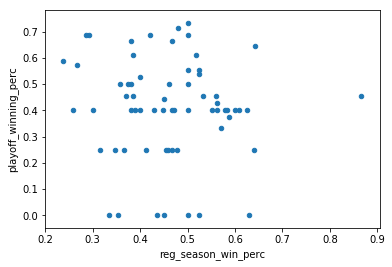

In [101]:
win_perc_df.plot(x='reg_season_win_perc', y='playoff_winning_perc', kind='scatter')

In [49]:
from scipy import stats

In [50]:
stats.ttest_rel(win_perc_df['reg_season_win_perc'], win_perc_df['playoff_winning_perc'])

Ttest_relResult(statistic=1.8681811337331555, pvalue=0.06638868730421317)

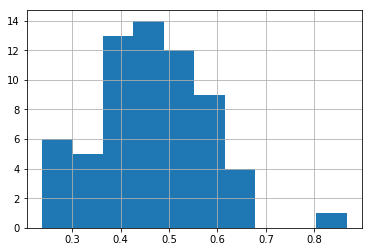

In [51]:
win_perc_df['reg_season_win_perc'].hist();

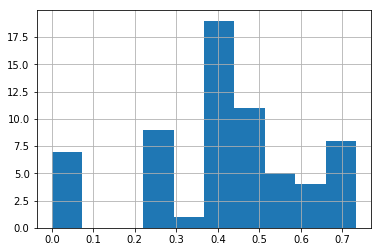

In [52]:
win_perc_df['playoff_winning_perc'].hist();

In [104]:
import statsmodels.api as sm
win_perc_df['intercept'] = 1

lm = sm.OLS(win_perc_df['reg_season_win_perc'], win_perc_df[['intercept', 'playoff_winning_perc']])
results = lm.fit()

In [105]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     reg_season_win_perc   R-squared:                       0.005
Model:                             OLS   Adj. R-squared:                 -0.011
Method:                  Least Squares   F-statistic:                    0.2943
Date:                 Fri, 19 Oct 2018   Prob (F-statistic):              0.589
Time:                         13:05:29   Log-Likelihood:                 49.069
No. Observations:                   64   AIC:                            -94.14
Df Residuals:                       62   BIC:                            -89.82
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
intercept                0.4790      0.033     14.306      0.000       0.412       0.546
playoff_winning_perc    -0.0402      0.074     -0.543      0.589      -0.188       0.108
==============================================================================
Omnibus:                        6.616   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.270
Skew:                           0.532   Prob(JB):                       0.0435
Kurtosis:                       4.104   Cond. No.                         6.09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
from scipy.stats import ttest_ind, ttest_ind_from_stats

ttest_ind(win_perc_df['reg_season_win_perc'], win_perc_df['playoff_winning_perc'], equal_var=False)

Ttest_indResult(statistic=1.9233445673898577, pvalue=0.05723555488487699)